In [1]:
cd D:\ArdenDocs\Modules\DataDesign

D:\ArdenDocs\Modules\DataDesign


Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

from math import sqrt
from pprint import pprint
from IPython.display import display
from scipy.spatial import ConvexHull
from matplotlib.pyplot import figure

from sklearn.metrics import r2_score
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split,RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [11]:
import matplotlib.ticker as mtick

Read the Dataset

In [3]:
ds = pd.read_csv("Telco-Customer-Churn.csv")
print("**Churn Telecom Dataset:**")

**Churn Telecom Dataset:**


In [4]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**In data analysis, churn refers to the phenomenon of customers or users discontinuing their relationship with a company or ceasing their engagement with a product or service. It is commonly used in industries such as telecommunications, software, subscription-based services, and e-commerce.**

**Churn analysis focuses on understanding and predicting customer attrition rates, identifying factors that contribute to churn, and developing strategies to mitigate it. By analyzing historical data and patterns, companies can gain insights into why customers are leaving and take proactive measures to retain them.**

**Churn can be classified into two types:**

**Customer Churn: This refers to the loss of customers or users. Customer churn analysis aims to understand the reasons behind customer attrition and develop retention strategies. It typically involves analyzing customer behavior, demographics, purchase history, customer support interactions, and other relevant data.**

**Revenue Churn: This refers to the loss of revenue generated from existing customers. Revenue churn analysis focuses on understanding the monetary impact of customer attrition. It involves analyzing changes in recurring revenue, average revenue per user, and other financial metrics.**

In [7]:
ds.shape

(7043, 21)

In [9]:
ds.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Objective : To analyse customer churn.

Data sample size : 7043, 21
target : churn


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Exploratory Data Analysis - Analyse features!!

In [12]:
# 1. Check for null/nan values
#df.isna().sum()

ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
first_rows = ds.head()



# Print the value and type of each column in the first rows
for column in first_rows.columns:
    column_values = first_rows[column]
    value = column_values.values[0]
    value_type = type(value).__name__
    print(f"Column: {column} - Value: {value} - Type: {value_type}\n")

Column: customerID - Value: 7590-VHVEG - Type: str

Column: gender - Value: Female - Type: str

Column: SeniorCitizen - Value: 0 - Type: int64

Column: Partner - Value: Yes - Type: str

Column: Dependents - Value: No - Type: str

Column: tenure - Value: 1 - Type: int64

Column: PhoneService - Value: No - Type: str

Column: MultipleLines - Value: No phone service - Type: str

Column: InternetService - Value: DSL - Type: str

Column: OnlineSecurity - Value: No - Type: str

Column: OnlineBackup - Value: Yes - Type: str

Column: DeviceProtection - Value: No - Type: str

Column: TechSupport - Value: No - Type: str

Column: StreamingTV - Value: No - Type: str

Column: StreamingMovies - Value: No - Type: str

Column: Contract - Value: Month-to-month - Type: str

Column: PaperlessBilling - Value: Yes - Type: str

Column: PaymentMethod - Value: Electronic check - Type: str

Column: MonthlyCharges - Value: 29.85 - Type: float64

Column: TotalCharges - Value: 29.85 - Type: str

Column: Churn - Va

Observation: Mismatch in datatype and value for column 'TotalCharges'

In [15]:
# Converting the datatype of 'TotalCharges' string to numeric.
# Note: use to_numeric(). This will keep the value as such by removing only the quotions.
#       as_type() will do additional datatype conversion which may change the original value.
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'], errors='coerce')

In [16]:
ds['TotalCharges'].dtype

dtype('float64')

In [17]:
#Check for nan values again particularly in 'TotalCharges' after data conversion
ds.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
ds.shape

(7043, 21)

In [19]:
# Dropped nan values as the number (11) is insignificant compared to sample size(7046)
ds.dropna(inplace=True)
ds.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
ds.shape

(7032, 21)

In [23]:
# Check for duplicates. If duplicates present remove them.
# Otherwise the trained  model may give biased predictions
ds.duplicated().sum()

0

**Preprocessing steps**

In [24]:
# Dropping unimportant feature - customer ID

ds_1 = ds.iloc[:, 1:]
ds_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#@title Default title text
#Replace the target feature 'Churn' with discrete values.

ds_1['Churn'].replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)
ds_1['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [26]:
ds_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [27]:
#Replace catergorical features with dummies.

ds_dummies = pd.get_dummies(ds_1)

In [28]:
ds_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [32]:
ds_dummies.replace(to_replace=[True, False], value=[1, 0], inplace=True)
ds_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


**Correlation matrix with "Churn"**

<Axes: >

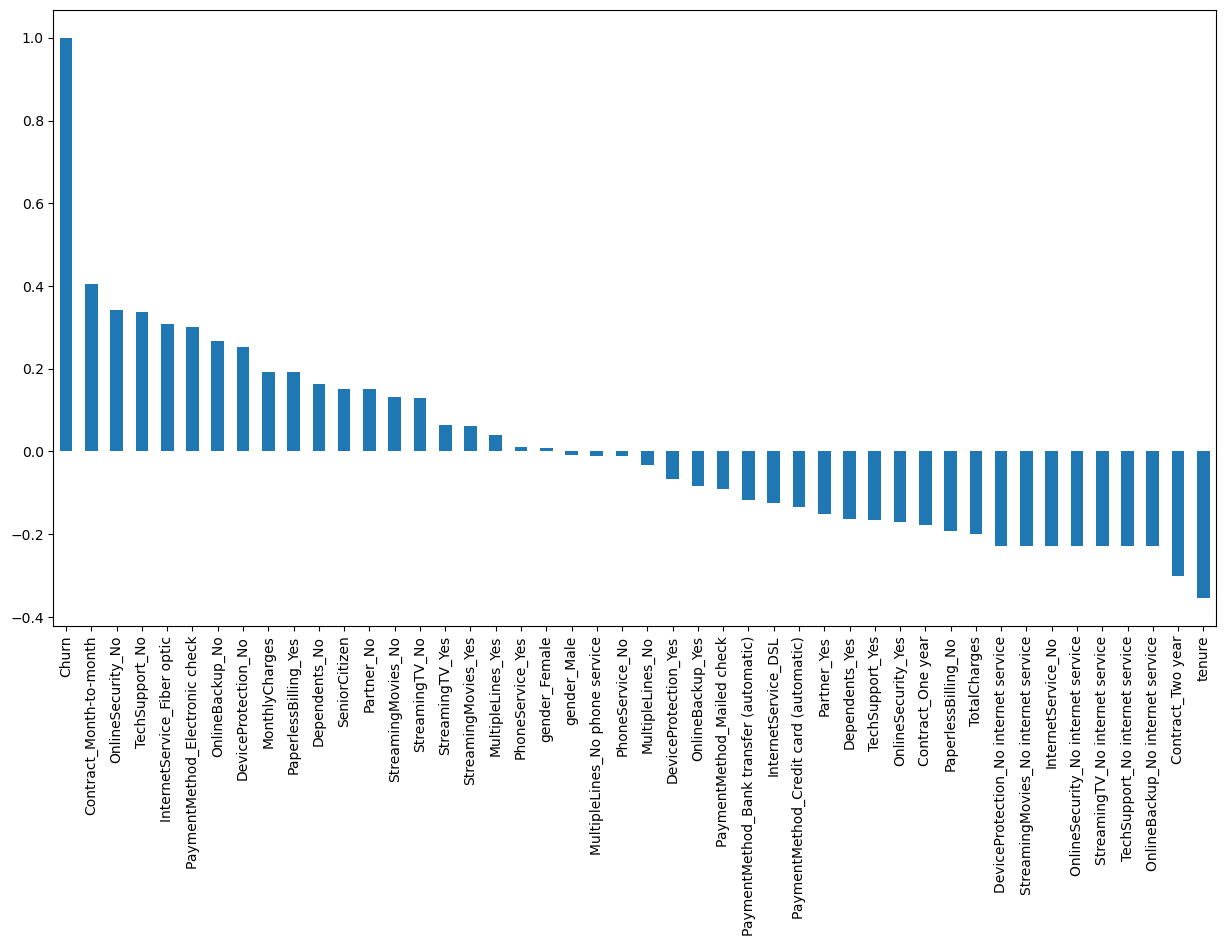

In [34]:
plt.figure(figsize=(15,8))
ds_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

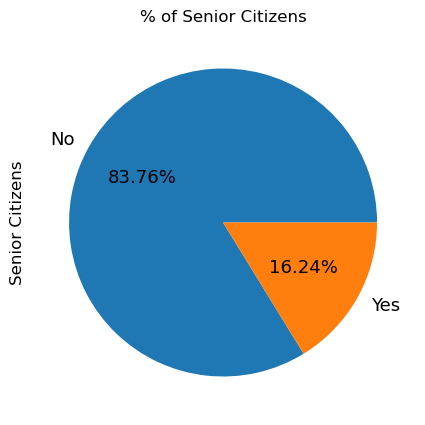

In [36]:
ax = (ds_dummies['SeniorCitizen'].value_counts()*100.0 /len(ds_dummies))\
.plot.pie(autopct='%.2f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 13 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)
plt.savefig("senior_citizen.png")    #Code for saving the plots in jupyter

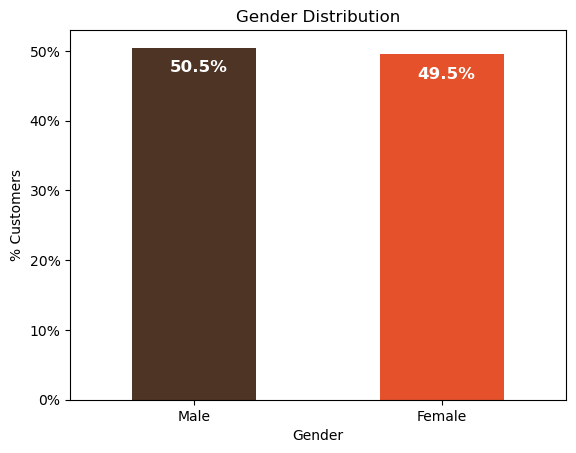

In [38]:
#@title Default title text
colors = ['#4D3425','#E4512B']
ax = (ds_1['gender'].value_counts()*100.0 /len(ds_1)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

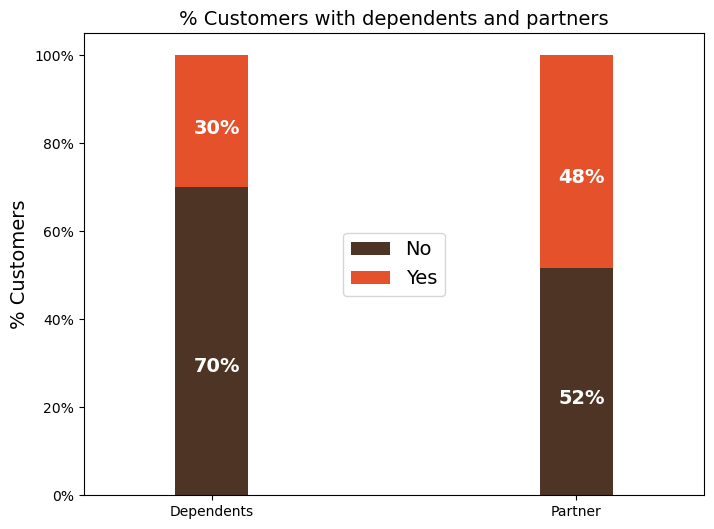

In [40]:
ds2 = pd.melt(ds, id_vars=['customerID'], value_vars=['Dependents','Partner'])
ds3 = ds2.groupby(['variable','value']).count().unstack()
ds3 = ds3*100/len(ds)
colors = ['#4D3425','#E4512B']
ax = ds3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

<Axes: xlabel='tenure'>

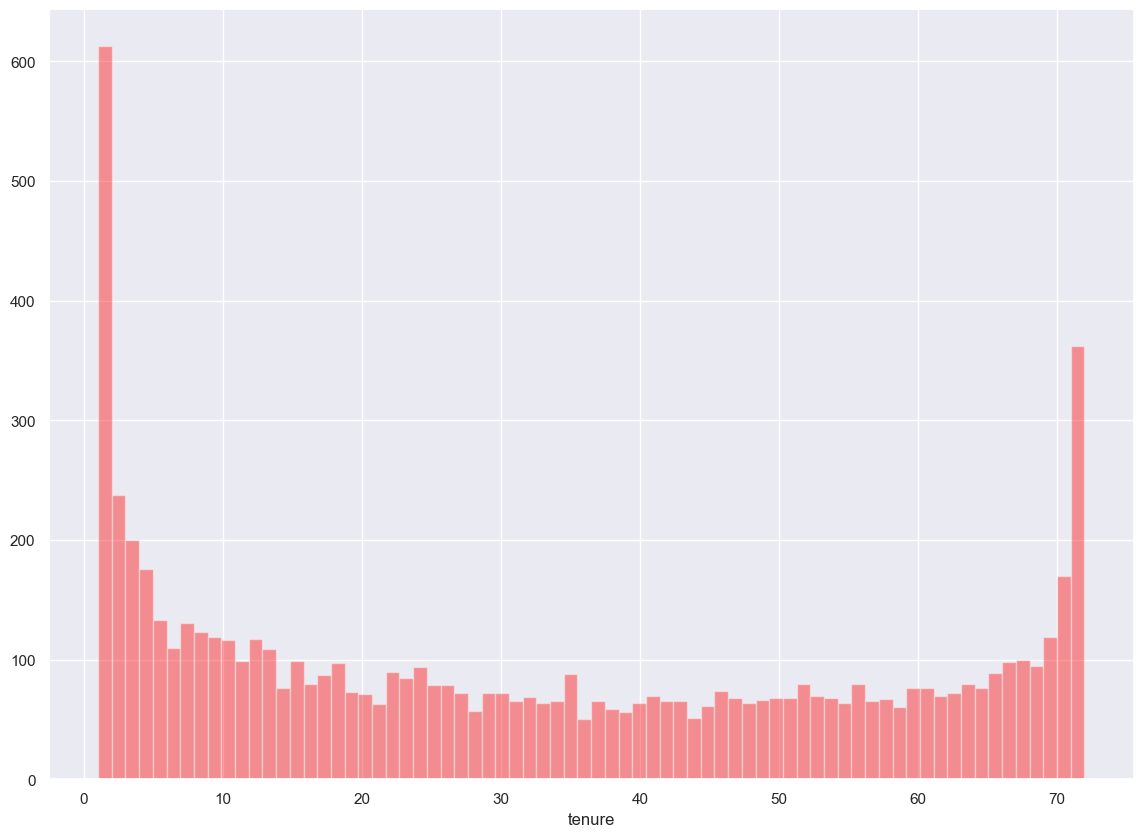

In [41]:
sns.set(rc={'figure.figsize':(14,10)})
sns.distplot(ds_dummies['tenure'], kde = False, color ='red', bins = 72, hist=True)

**'tenure' is the number of months the customer is with the company. Observation: On the first month, the number of customers is more! And more customers in 72nd (6 years) month. Why? Anything special about the contract type? Plotting the following bar plot to understand the contract type.**

In [1]:
ds_dummies

NameError: name 'ds_dummies' is not defined

In [42]:
ds_dummies['tenure'].nunique()

72

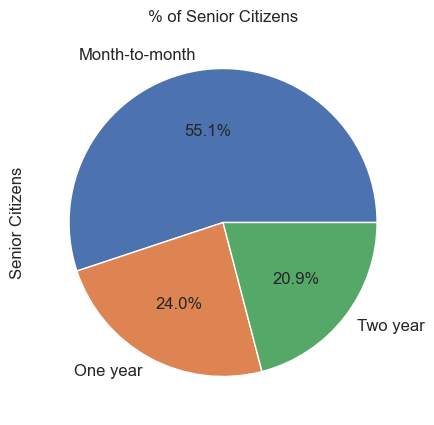

In [44]:
label = ds['Contract'].unique()
ax = (ds['Contract'].value_counts()*100.0 /len(ds))\
.plot.pie(autopct='%.1f%%', labels = label,figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

plt.show()

<Axes: xlabel='Contract'>

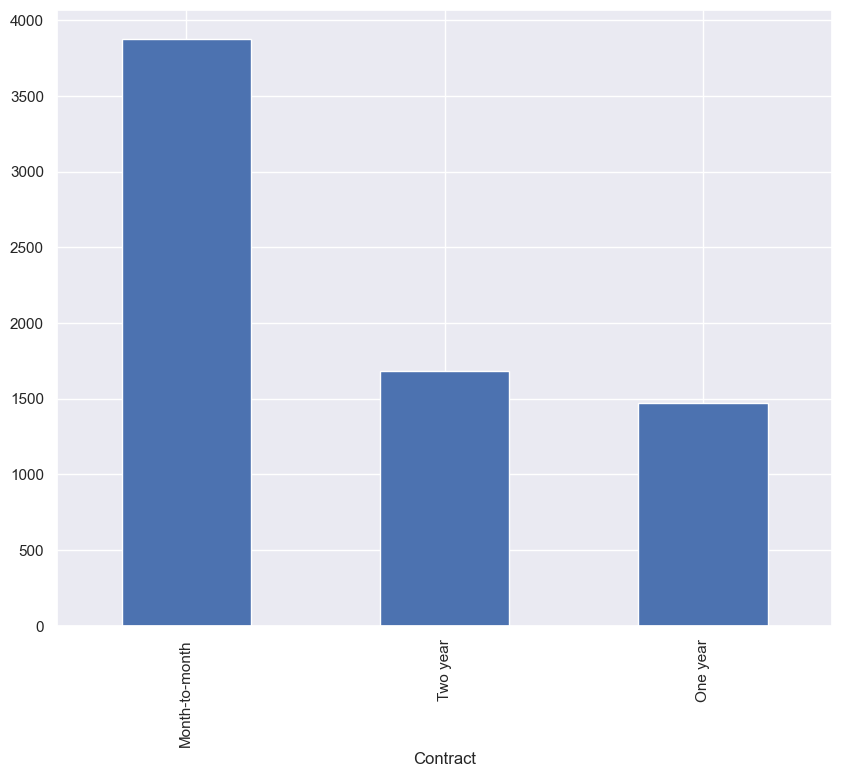

In [45]:
sns.set(rc={'figure.figsize':(10,8)})
ds['Contract'].value_counts().plot(kind='bar')

In [47]:
ds_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

Observation: The bar plot of 'Contract' feature shows that the number of customers are more with montly contract, followed by 2 years and then 1 years. This is comparable to the distribution plot of 'tenure' feature.

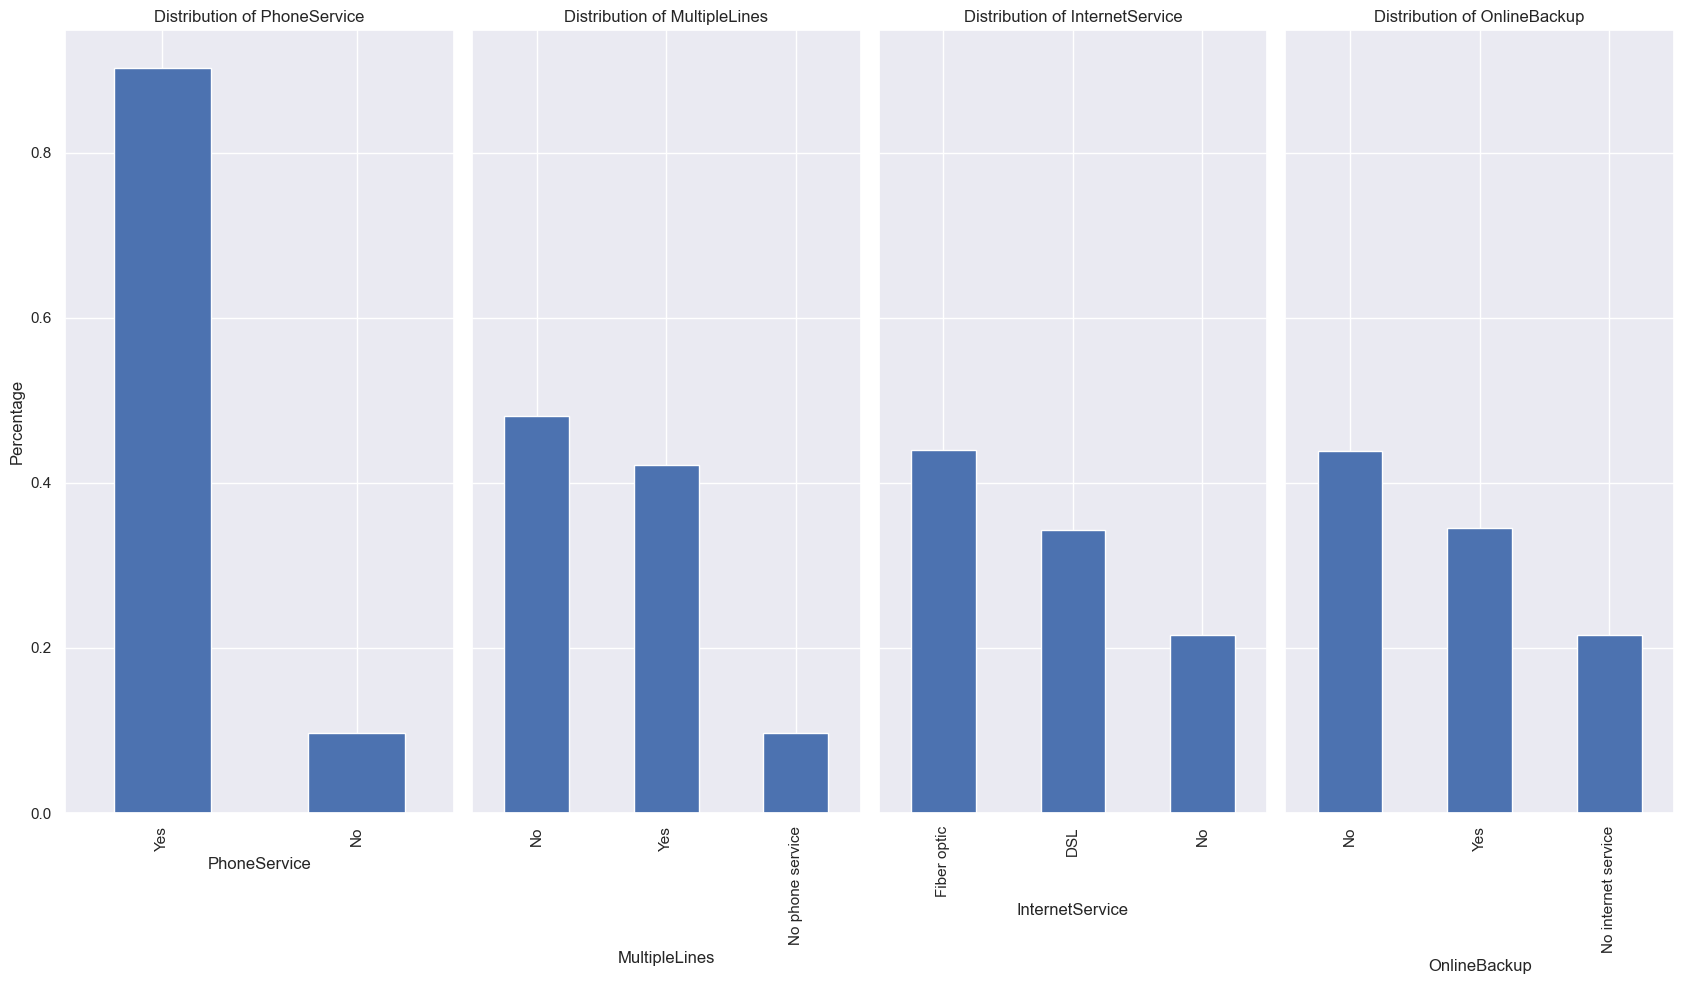

In [48]:
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup']


fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(17, 10), sharey=True)

for i, column in enumerate(columns_to_plot):
    (ds[column].value_counts() / len(ds_dummies)).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')

plt.tight_layout()
plt.show()